# Import libraries

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Define the and function

In [6]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 0, 1])

In [7]:
for i in range(len(X)):
    print(X[i], y[i])

[0 0] 0
[0 1] 0
[1 0] 0
[1 1] 1


In [8]:
def add_noise_data(input_data, input_labels, n_points, mean, scale):
    """
    Create a noise verstion of the input data
    
    Params:
        input_data: base input data
        input_labels: base input labels
        n_points: the number of needed points
        mean, scale: the gaussian data
    """
    raw_X = []
    raw_labels = []
    
    noise = np.random.normal(loc=mean, scale=scale, size=(n_points, 2))
    for i in range(n_points):
        k = np.random.randint(len(input_data))
        
        raw_X.append([input_data[k][0] + noise[i][0], 
                      input_data[k][1] + noise[i][1]])
        
        raw_labels.append(input_labels[k])
        
    return np.array(raw_X), np.array(raw_labels)

In [9]:
X_noise, y_noise = add_noise_data(X, y, 100, 0., 0.2)

In [10]:
def plot_clusters(_x, labels, std, list_labels = ['False', 'True']):
    colors = ['#4EACC5', '#FF9C34']
    y_m = labels
    for k, col in zip(range(len(labels)), colors):
        my_members = y_m == k
        print(_x[my_members].shape)
        plt.scatter(_x[my_members, 0], _x[my_members, 1], marker='o', label = list_labels[k])
    plt.title('Noisy AND dataset with std = %.1f' % std)
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.show()

(70, 2)
(30, 2)


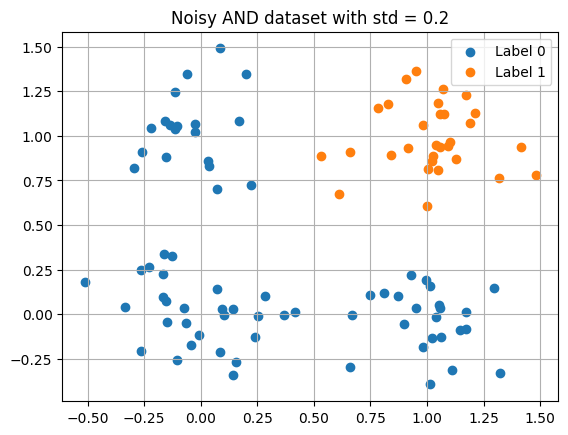

In [11]:
plot_clusters(X_noise, y_noise, 0.2, list_labels=['Label 0', 'Label 1'])

(73, 2)
(27, 2)


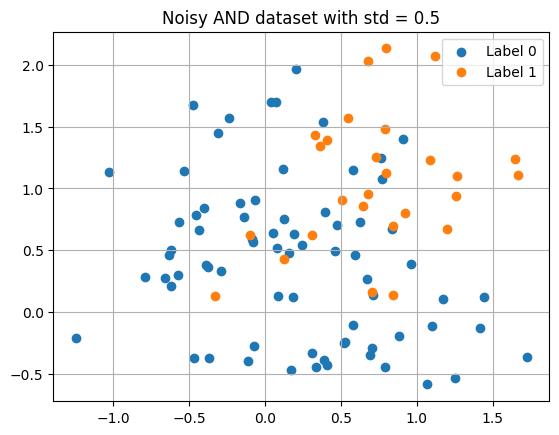

In [12]:
X_high_noise, y_high_noise = add_noise_data(X, y, 100, 0., 0.5)
plot_clusters(X_high_noise, y_high_noise, 0.5, list_labels=['Label 0', 'Label 1'])

In [13]:
for i in range(20):
    print('(%.1f, %.1f)' % (X_high_noise[i][0], X_high_noise[i][1]), y_high_noise[i])

(0.6, -0.1) 0
(1.0, 0.4) 0
(0.7, 1.0) 1
(1.7, 1.2) 1
(0.4, 1.4) 1
(0.9, 0.8) 1
(0.1, 1.7) 0
(0.4, 1.5) 0
(1.4, 0.1) 0
(0.7, 0.3) 0
(-0.7, 0.3) 0
(-0.2, 0.9) 0
(1.1, 1.2) 1
(0.6, 0.7) 0
(0.4, 0.8) 0
(-1.2, -0.2) 0
(-0.1, 0.6) 0
(0.3, 1.4) 1
(0.4, 1.3) 1
(0.2, 0.6) 0


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

### b. Suppose we train a logistic regression model follow the ERM framework on the dataset to reach err cD(h) = 0.

In [18]:
# Seed for reproducibility
np.random.seed(0)

# Generate noisy dataset
X_noise, y_noise = add_noise_data(X, y, 100, 0., 0.2)

# Train Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_noise, y_noise)

# Predict on the noisy dataset
y_pred = log_reg.predict(X_noise)

# Calculate accuracy
accuracy = accuracy_score(y_noise, y_pred)

# Display results
accuracy

0.95

After training the logistic regression model on the noisy dataset, an accuracy of 95% was achieved. This shows that the classification model is quite good on this dataset, although not perfect. We need to iterate over a significant number of seed values and train the model for each seed. Based on the training results, we can create a statistical table of the probability the model achieves

In [19]:
num_trials = 100
successful_zero_error = 0

# Loop over several random seeds to evaluate the variability of model performance
for seed in range(num_trials):
    np.random.seed(seed)
    X_noise, y_noise = add_noise_data(X, y, 100, 0., 0.2)
    log_reg = LogisticRegression()
    log_reg.fit(X_noise, y_noise)
    y_pred = log_reg.predict(X_noise)
    accuracy = accuracy_score(y_noise, y_pred)
    if accuracy == 1.0:  # If the model achieves perfect classification
        successful_zero_error += 1

# Calculate the probability of achieving c_D(h) = 0
probability_zero_error = successful_zero_error / num_trials

probability_zero_error

0.03

Through 100 trials with different seed values, the probability for the logistic regression model is achieved perfect classification on noisy data set is 3%. This shows that, although the model can achieve good performance on noisy data sets, the possibility of achieving perfect classification is not high.

As such, when working with noisy data and logistic regression models within the Empirical Risk Minimization (ERM) framework, it is necessary to accept that although fairly high performance can be achieved, achieving a perfect model is difficult.

### c. What happened when we increase the number of training samples in D. Validate by your experiments?

In [20]:
def evaluate_model_performance(dataset_size_range):
    accuracies = []
    for n_points in dataset_size_range:
        np.random.seed(0)  # For reproducibility
        X_noise, y_noise = add_noise_data(X, y, n_points, 0., 0.2)
        log_reg = LogisticRegression()
        log_reg.fit(X_noise, y_noise)
        y_pred = log_reg.predict(X_noise)
        accuracy = accuracy_score(y_noise, y_pred)
        accuracies.append(accuracy)
    return accuracies

# Define different dataset sizes to evaluate
dataset_size_range = [10, 50, 100, 500, 1000, 5000]

# Evaluate model performance
accuracies = evaluate_model_performance(dataset_size_range)

# Display accuracies as we increase the dataset size
dataset_size_range, accuracies

([10, 50, 100, 500, 1000, 5000], [1.0, 0.96, 0.95, 0.974, 0.98, 0.9738])

- Initial Increase in Accuracy: As the number of samples increases from 10 to 1000, we generally see an increase in accuracy, which aligns with the expectation that more data can help the model learn better and generalize more effectively.
- 
High Initial Accuracy: The model trained with just 10 samples achieved 100% accuracy, likely due to the simplicity of the "AND" function and the small dataset size making it easy for the model to perfectly separate the classes. However, this might not generalize well to unseen data.- 
Plateauing of Accuracy: Beyond a certain point (1000 samples), adding more samples does not significantly increase accuracy. The model achieves around 97%-98% accuracy, indicating that we've reached a point of diminishing returns where additional data does not contribute to a substantial improvement in model performance.

### d. What happened when we draw the train samples from N(0, 0.2) and the test samples from N(0, 0.3)

In [21]:
# Generate training data with noise from N(0, 0.2)
np.random.seed(0)  # For reproducibility
X_train_noise, y_train_noise = add_noise_data(X, y, 1000, 0., 0.2)

# Generate test data with noise from N(0, 0.3)
X_test_noise, y_test_noise = add_noise_data(X, y, 1000, 0., 0.3)

# Train Logistic Regression model on the training data
log_reg = LogisticRegression()
log_reg.fit(X_train_noise, y_train_noise)

# Predict on the test data
y_test_pred = log_reg.predict(X_test_noise)

# Calculate accuracy on the test set
test_accuracy = accuracy_score(y_test_noise, y_test_pred)

test_accuracy

0.912

- The model's performance on the test set, while still relatively high, is lower than what we observed for training sets with noise from the same distribution. This decrease in accuracy aligns with the expectation that the model may struggle to generalize to data with higher variance.
- Increased Test Error: As anticipated, introducing a discrepancy between the noise distributions of the training and test datasets leads to an increased error rate on the test set compared to scenarios where the training and test data come from the same distribution.
- Evidence of Overfitting: The model has likely learned some characteristics specific to the training data's noise distribution, which do not generalize well to the test set with its different noise characteristics.
